In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, AgglomerativeClustering

In [12]:
filename =('/content/drive/MyDrive/CODING DOJO/Códigos/Semana 8/cust_seg.csv')
df = pd.read_csv(filename, sep=',')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [13]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [14]:
df.set_index('Customer Id', inplace = True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [15]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [16]:
df=df.dropna(how = 'any')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              700 non-null    int64  
 1   Edu              700 non-null    int64  
 2   Years Employed   700 non-null    int64  
 3   Income           700 non-null    int64  
 4   Card Debt        700 non-null    float64
 5   Other Debt       700 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 49.2 KB


In [18]:
# Instancia de escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df)

In [28]:
# Instanciar KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.33496643365707623

In [30]:
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)
silhouette_score(scaled_df, hc.labels_)

0.3357297821671033

In [46]:
dbs = DBSCAN(eps = 2, min_samples = 5).fit(scaled_df)
silhouette_score(scaled_df, dbs.labels_)

0.25638311628909666

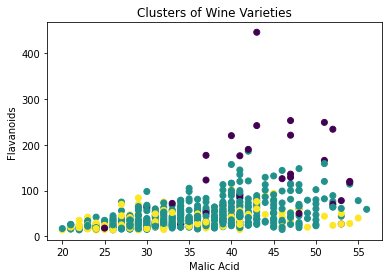

In [47]:
# Guardar las etiquetas del clúster en el marco de datos
df['cluster'] = dbs.labels_
# Visualizar los clústers
plt.scatter(df['Age'], df['Income'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('Income')

Text(0, 0.5, 'Income')

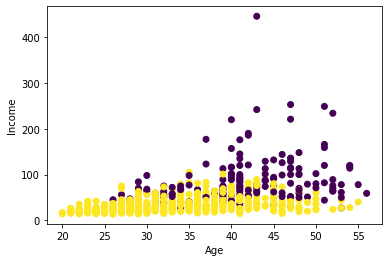

In [49]:
# Guardar las etiquetas del clúster en el marco de datos
df['cluster'] = kmeans.labels_
# Visualizar los clústers
plt.scatter(df['Age'], df['Income'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('Income')

Text(0, 0.5, 'Income')

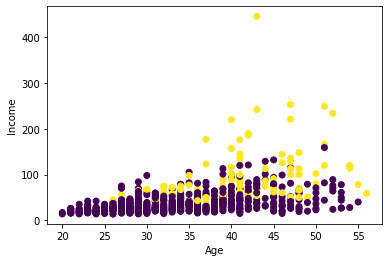

In [50]:
# Guardar las etiquetas del clúster en el marco de datos
df['cluster'] = hc.labels_
# Visualizar los clústers
plt.scatter(df['Age'], df['Income'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('Income')